In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


we have got the data, now need to unzip

In [6]:
import zipfile
zip_ref = zipfile.ZipFile(r'C:\Users\Shashank B G\OneDrive\Desktop\Deeplearning\archive (2).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

Generators:- they divide the data in to some small batches and stores that batch to RAM and after processing the bath it will removes and stores new batch to the RAM for operation

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)#to make all images of same size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)#to make all images of same size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


here the dataset is of the form in the range 0 to 256 , so we need to bring it down to 0 to 1 for better performance

we do this by NORMALIZATION

In [9]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [29]:
#CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [33]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 128)      

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 56s 85ms/step - loss: 0.6612 - accuracy: 0.5998 - val_loss: 0.6001 - val_accuracy: 0.6700
Epoch 2/5
625/625 [==============================] - 55s 88ms/step - loss: 0.5465 - accuracy: 0.7219 - val_loss: 0.4974 - val_accuracy: 0.7524
Epoch 3/5
625/625 [==============================] - 53s 85ms/step - loss: 0.4314 - accuracy: 0.7972 - val_loss: 0.4756 - val_accuracy: 0.7902
Epoch 4/5
625/625 [==============================] - 58s 92ms/step - loss: 0.3081 - accuracy: 0.8653 - val_loss: 0.5465 - val_accuracy: 0.7994
Epoch 5/5
625/625 [==============================] - 55s 88ms/step - loss: 0.1767 - accuracy: 0.9285 - val_loss: 0.7136 - val_accuracy: 0.7764


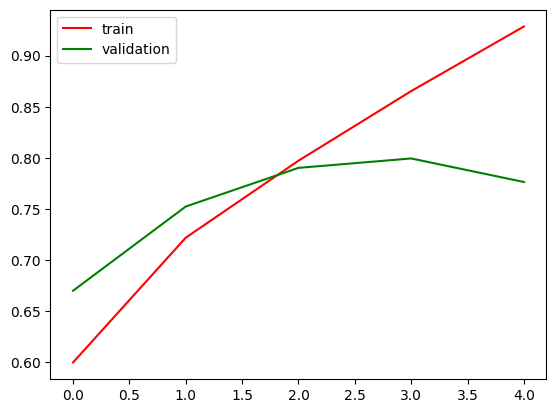

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()


we can see lot of gap between two lines, that is called overfitting,
To reduce overfitting we need to do
  1.Batchnormalization
  2.Dropoutlayers

In [76]:
import cv2

In [88]:
demo_img = cv2.imread('/content/cat_img_CNN.jpeg')

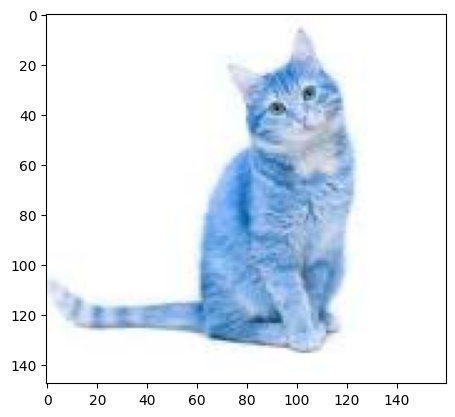

In [89]:
plt.imshow(demo_img)

In [90]:
demo_img.shape

(148, 160, 3)

In [97]:
test_img=cv2.resize(demo_img,(256,256))

In [98]:
test_data=test_img.reshape((1,256,256,3))  #1 is batch here, in this batch here we have only 1 data

In [99]:
test_data.shape

(1, 256, 256, 3)

1 ===> DOG:  
0 ===> CAT

In [100]:
model.predict(test_data)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)